In [1]:
import joblib
import gzip
import pandas
import pickle
import seaborn
import tqdm

from lib.models.generic_v0.model import map_params

In [2]:
import sys

util_dir = "./sprint-0-explicit-mdps/"
sys.path.append(util_dir)

import util

In [3]:
mdps = pandas.read_pickle("5-generated-mdps/fixed.pkl.gz")
mdps

,problem,model,force_consider_own,merge_isomorphic,truncate_common_chain,collect_garbage,reward_common_chain,protocol,dag_size_limit,size,time_spent,rss,mdp
0,v1,generic-v1,False,False,True,True,True,bitcoin,6,21327,12.222814,1.030365,1627bcdb
1,v1,generic-v1,False,False,True,True,True,ethereum_3,6,32961,24.590825,1.062309,5756a79e
2,v1,generic-v1,False,False,True,True,True,byzantium_3,6,33016,25.771648,1.063354,64fe1172
3,v1,generic-v1,False,False,True,True,True,ghostdag_3,6,46966,38.322568,1.018120,2ef7d193
4,v1,generic-v1,False,False,True,True,True,parallel_3,6,9122,4.753626,0.995956,30890085
5,v1+n,generic-v1,False,True,True,True,True,bitcoin,6,5724,4.801054,1.013176,65c7c142
6,v1+n,generic-v1,False,True,True,True,True,ethereum_3,6,10293,8.174692,1.015556,2f839728
7,v1+n,generic-v1,False,True,True,True,True,byzantium_3,6,9879,8.310380,1.013790,5988be96
8,v1+n,generic-v1,False,True,True,True,True,ghostdag_3,6,12644,11.287202,0.991020,54fff1d1
9,v0,generic-v0,False,False,True,True,True,bitcoin,6,42041,28.400720,0.626945,395244b0


In [4]:
networks = []
# for alpha in range(35, 41, 5):
for alpha in range(5, 51, 5):
    for gamma in [0.33, 0.66]:
        # for gamma in [0, 0.5, 1]:
        networks.append(dict(alpha=alpha / 100, gamma=gamma))
# pandas.DataFrame(networks)

In [5]:
horizon = 100
stop_delta = (
    0.0001  # value iteration stops when no value estimate changes more than this value
)

In [6]:
def optimize(network, idx, row):
    with gzip.open(f"5-generated-mdps/mdp-{row.mdp}.pkl.gz", "rb") as f:
        emdp = pickle.load(f)
        emdp = map_params(emdp, **network)
        oae = util.optimize_and_evaluate(emdp, eps=stop_delta, horizon=horizon)
        return row.to_dict() | dict(horizon=horizon) | network | oae


def generate_jobs():
    for network in networks:
        for idx, row in mdps.iterrows():
            # if row['size'] > 1000:
            #    continue
            yield joblib.delayed(optimize)(network, idx, row)


jobs = list(generate_jobs())
generate_solutions = joblib.Parallel(return_as="generator_unordered", n_jobs=6)(jobs)
with_progress = tqdm.tqdm(generate_solutions, total=len(jobs))
df = pandas.DataFrame(with_progress)
df.to_pickle("5-value-iterations.pkl.gz")
df

  0%|                                                                                                                                                                 | 0/480 [00:00<?, ?it/s]

  0%|▎                                                                                                                                                      | 1/480 [00:38<5:05:50, 38.31s/it]

  0%|▋                                                                                                                                                      | 2/480 [00:52<3:10:32, 23.92s/it]

  1%|▉                                                                                                                                                      | 3/480 [01:34<4:15:28, 32.14s/it]

  1%|█▎                                                                                                                                                     | 4/480 [01:42<3:00:16, 22.72s/it]

  1%|█▌                                                                                                                                                     | 5/480 [02:17<3:34:27, 27.09s/it]

  1%|█▉                                                                                                                                                     | 6/480 [02:17<2:21:56, 17.97s/it]

  1%|██▏                                                                                                                                                    | 7/480 [02:17<1:35:54, 12.17s/it]

  2%|██▌                                                                                                                                                    | 8/480 [02:20<1:12:30,  9.22s/it]

  2%|██▊                                                                                                                                                    | 9/480 [02:26<1:03:55,  8.14s/it]

  2%|███▏                                                                                                                                                    | 10/480 [02:31<56:30,  7.21s/it]

  2%|███▍                                                                                                                                                    | 11/480 [02:31<39:59,  5.12s/it]

  2%|███▊                                                                                                                                                    | 12/480 [02:39<46:50,  6.01s/it]

  3%|████                                                                                                                                                    | 13/480 [02:44<42:34,  5.47s/it]

  3%|████▍                                                                                                                                                   | 14/480 [02:45<33:43,  4.34s/it]

  3%|████▊                                                                                                                                                   | 15/480 [02:48<29:35,  3.82s/it]

  3%|█████                                                                                                                                                   | 16/480 [02:48<21:43,  2.81s/it]

  4%|█████▍                                                                                                                                                  | 17/480 [02:51<20:43,  2.69s/it]

  4%|█████▋                                                                                                                                                  | 18/480 [02:51<15:35,  2.02s/it]

  4%|██████                                                                                                                                                  | 19/480 [02:54<16:45,  2.18s/it]

  4%|██████▎                                                                                                                                                 | 20/480 [02:55<15:04,  1.97s/it]

  4%|██████▋                                                                                                                                                 | 21/480 [02:56<12:28,  1.63s/it]

  5%|██████▉                                                                                                                                                 | 22/480 [03:04<27:33,  3.61s/it]

  5%|███████▏                                                                                                                                              | 23/480 [03:28<1:13:05,  9.60s/it]

  5%|███████▌                                                                                                                                              | 24/480 [04:17<2:43:42, 21.54s/it]

  5%|███████▊                                                                                                                                              | 25/480 [04:53<3:14:34, 25.66s/it]

  5%|████████▏                                                                                                                                             | 26/480 [05:09<2:53:04, 22.87s/it]

  6%|████████▍                                                                                                                                             | 27/480 [05:47<3:26:20, 27.33s/it]

  6%|████████▊                                                                                                                                             | 28/480 [05:51<2:32:58, 20.31s/it]

  6%|█████████                                                                                                                                             | 29/480 [05:58<2:03:34, 16.44s/it]

  6%|█████████▍                                                                                                                                            | 30/480 [05:58<1:26:52, 11.58s/it]

  6%|█████████▋                                                                                                                                            | 31/480 [05:59<1:01:43,  8.25s/it]

  7%|██████████▏                                                                                                                                             | 32/480 [06:00<46:48,  6.27s/it]

  7%|██████████▍                                                                                                                                             | 33/480 [06:02<37:15,  5.00s/it]

  7%|██████████▊                                                                                                                                             | 34/480 [06:06<34:51,  4.69s/it]

  7%|███████████                                                                                                                                             | 35/480 [06:08<27:13,  3.67s/it]

  8%|███████████▍                                                                                                                                            | 36/480 [06:13<31:18,  4.23s/it]

  8%|███████████▋                                                                                                                                            | 37/480 [06:19<35:28,  4.80s/it]

  8%|████████████                                                                                                                                            | 38/480 [06:21<28:40,  3.89s/it]

  8%|████████████▎                                                                                                                                           | 39/480 [06:23<23:42,  3.22s/it]

  8%|████████████▋                                                                                                                                           | 40/480 [06:24<20:01,  2.73s/it]

  9%|████████████▉                                                                                                                                           | 41/480 [06:26<17:26,  2.38s/it]

  9%|█████████████▎                                                                                                                                          | 42/480 [06:28<15:48,  2.16s/it]

  9%|█████████████▌                                                                                                                                          | 43/480 [06:29<14:05,  1.94s/it]

  9%|█████████████▉                                                                                                                                          | 44/480 [06:31<15:06,  2.08s/it]

  9%|██████████████▎                                                                                                                                         | 45/480 [06:32<11:16,  1.56s/it]

 10%|██████████████▌                                                                                                                                         | 46/480 [06:45<35:42,  4.94s/it]

 10%|██████████████▋                                                                                                                                       | 47/480 [09:02<5:21:57, 44.61s/it]

 10%|███████████████                                                                                                                                       | 48/480 [09:42<5:10:52, 43.18s/it]

 10%|███████████████▎                                                                                                                                      | 49/480 [09:52<3:58:22, 33.18s/it]

 10%|███████████████▋                                                                                                                                      | 50/480 [10:00<3:04:56, 25.80s/it]

 11%|███████████████▉                                                                                                                                      | 51/480 [10:09<2:27:11, 20.59s/it]

 11%|████████████████▎                                                                                                                                     | 52/480 [10:23<2:13:46, 18.75s/it]

 11%|████████████████▌                                                                                                                                     | 53/480 [10:40<2:09:33, 18.21s/it]

 11%|████████████████▉                                                                                                                                     | 54/480 [10:40<1:31:03, 12.83s/it]

 11%|█████████████████▏                                                                                                                                    | 55/480 [10:40<1:04:09,  9.06s/it]

 12%|█████████████████▋                                                                                                                                      | 56/480 [10:44<51:35,  7.30s/it]

 12%|██████████████████                                                                                                                                      | 57/480 [10:50<50:09,  7.11s/it]

 12%|██████████████████▎                                                                                                                                     | 58/480 [10:56<47:06,  6.70s/it]

 12%|██████████████████▋                                                                                                                                     | 59/480 [10:58<36:30,  5.20s/it]

 12%|███████████████████                                                                                                                                     | 60/480 [10:58<25:45,  3.68s/it]

 13%|███████████████████▎                                                                                                                                    | 61/480 [11:05<32:32,  4.66s/it]

 13%|███████████████████▋                                                                                                                                    | 62/480 [11:07<26:42,  3.83s/it]

 13%|███████████████████▉                                                                                                                                    | 63/480 [11:09<22:27,  3.23s/it]

 13%|████████████████████▎                                                                                                                                   | 64/480 [11:10<19:14,  2.78s/it]

 14%|████████████████████▌                                                                                                                                   | 65/480 [11:11<15:49,  2.29s/it]

 14%|████████████████████▉                                                                                                                                   | 66/480 [11:12<11:39,  1.69s/it]

 14%|█████████████████████▏                                                                                                                                  | 67/480 [11:13<11:43,  1.70s/it]

 14%|█████████████████████▌                                                                                                                                  | 68/480 [11:15<10:39,  1.55s/it]

 14%|█████████████████████▊                                                                                                                                  | 69/480 [11:15<08:31,  1.24s/it]

 15%|██████████████████████▏                                                                                                                                 | 70/480 [11:16<07:30,  1.10s/it]

 15%|██████████████████████▏                                                                                                                               | 71/480 [13:47<5:13:47, 46.03s/it]

 15%|██████████████████████▌                                                                                                                               | 72/480 [13:49<3:43:45, 32.91s/it]

 15%|██████████████████████▊                                                                                                                               | 73/480 [14:31<4:00:30, 35.46s/it]

 15%|███████████████████████▏                                                                                                                              | 74/480 [14:33<2:53:14, 25.60s/it]

 16%|███████████████████████▍                                                                                                                              | 75/480 [14:44<2:23:17, 21.23s/it]

 16%|███████████████████████▊                                                                                                                              | 76/480 [14:52<1:55:44, 17.19s/it]

 16%|████████████████████████                                                                                                                              | 77/480 [15:14<2:05:12, 18.64s/it]

 16%|████████████████████████▍                                                                                                                             | 78/480 [15:14<1:28:06, 13.15s/it]

 16%|████████████████████████▋                                                                                                                             | 79/480 [15:15<1:02:11,  9.31s/it]

 17%|█████████████████████████▎                                                                                                                              | 80/480 [15:18<50:04,  7.51s/it]

 17%|█████████████████████████▋                                                                                                                              | 81/480 [15:25<48:29,  7.29s/it]

 17%|█████████████████████████▉                                                                                                                              | 82/480 [15:31<45:25,  6.85s/it]

 17%|██████████████████████████▎                                                                                                                             | 83/480 [15:31<32:09,  4.86s/it]

 18%|██████████████████████████▌                                                                                                                             | 84/480 [15:37<34:19,  5.20s/it]

 18%|██████████████████████████▉                                                                                                                             | 85/480 [15:39<28:29,  4.33s/it]

 18%|███████████████████████████▏                                                                                                                            | 86/480 [15:41<23:47,  3.62s/it]

 18%|███████████████████████████▌                                                                                                                            | 87/480 [15:45<23:39,  3.61s/it]

 18%|███████████████████████████▊                                                                                                                            | 88/480 [15:45<17:07,  2.62s/it]

 19%|████████████████████████████▏                                                                                                                           | 89/480 [15:47<15:37,  2.40s/it]

 19%|████████████████████████████▌                                                                                                                           | 90/480 [15:48<12:46,  1.97s/it]

 19%|████████████████████████████▊                                                                                                                           | 91/480 [15:48<09:37,  1.48s/it]

 19%|█████████████████████████████▏                                                                                                                          | 92/480 [15:50<10:27,  1.62s/it]

 20%|█████████████████████████████▊                                                                                                                          | 94/480 [15:52<08:26,  1.31s/it]

 20%|█████████████████████████████▋                                                                                                                        | 95/480 [18:37<4:28:25, 41.83s/it]

 20%|██████████████████████████████                                                                                                                        | 96/480 [19:27<4:41:46, 44.03s/it]

 20%|██████████████████████████████▎                                                                                                                       | 97/480 [19:27<3:25:02, 32.12s/it]

 20%|██████████████████████████████▋                                                                                                                       | 98/480 [19:39<2:47:34, 26.32s/it]

 21%|██████████████████████████████▉                                                                                                                       | 99/480 [19:59<2:36:31, 24.65s/it]

 21%|███████████████████████████████                                                                                                                      | 100/480 [20:11<2:12:59, 21.00s/it]

 21%|███████████████████████████████▎                                                                                                                     | 101/480 [20:13<1:36:48, 15.33s/it]

 21%|███████████████████████████████▋                                                                                                                     | 102/480 [20:13<1:09:00, 10.95s/it]

 21%|████████████████████████████████▍                                                                                                                      | 103/480 [20:13<48:55,  7.79s/it]

 22%|████████████████████████████████▋                                                                                                                      | 104/480 [20:17<41:33,  6.63s/it]

 22%|█████████████████████████████████                                                                                                                      | 105/480 [20:25<42:58,  6.88s/it]

 22%|█████████████████████████████████▎                                                                                                                     | 106/480 [20:31<41:32,  6.66s/it]

 22%|█████████████████████████████████▋                                                                                                                     | 107/480 [20:40<46:04,  7.41s/it]

 22%|█████████████████████████████████▉                                                                                                                     | 108/480 [20:42<35:40,  5.75s/it]

 23%|██████████████████████████████████▎                                                                                                                    | 109/480 [20:44<28:21,  4.59s/it]

 23%|██████████████████████████████████▌                                                                                                                    | 110/480 [20:46<23:33,  3.82s/it]

 23%|██████████████████████████████████▉                                                                                                                    | 111/480 [20:50<23:45,  3.86s/it]

 23%|███████████████████████████████████▏                                                                                                                   | 112/480 [20:53<21:51,  3.56s/it]

 24%|███████████████████████████████████▌                                                                                                                   | 113/480 [20:53<16:04,  2.63s/it]

 24%|███████████████████████████████████▊                                                                                                                   | 114/480 [20:54<12:16,  2.01s/it]

 24%|████████████████████████████████████▏                                                                                                                  | 115/480 [20:57<13:31,  2.22s/it]

 24%|████████████████████████████████████▍                                                                                                                  | 116/480 [20:57<10:29,  1.73s/it]

 24%|████████████████████████████████████▊                                                                                                                  | 117/480 [20:59<10:05,  1.67s/it]

 25%|█████████████████████████████████████                                                                                                                  | 118/480 [21:12<31:03,  5.15s/it]

 25%|████████████████████████████████████▉                                                                                                                | 119/480 [23:47<5:00:46, 49.99s/it]

 25%|█████████████████████████████████████▎                                                                                                               | 120/480 [23:58<3:50:17, 38.38s/it]

 25%|█████████████████████████████████████▌                                                                                                               | 121/480 [24:34<3:46:04, 37.79s/it]

 25%|█████████████████████████████████████▊                                                                                                               | 122/480 [24:42<2:51:41, 28.78s/it]

 26%|██████████████████████████████████████▏                                                                                                              | 123/480 [24:50<2:13:51, 22.50s/it]

 26%|██████████████████████████████████████▍                                                                                                              | 124/480 [25:10<2:09:18, 21.79s/it]

 26%|██████████████████████████████████████▊                                                                                                              | 125/480 [25:29<2:03:26, 20.86s/it]

 26%|███████████████████████████████████████                                                                                                              | 126/480 [25:29<1:26:39, 14.69s/it]

 26%|███████████████████████████████████████▍                                                                                                             | 127/480 [25:29<1:00:57, 10.36s/it]

 27%|████████████████████████████████████████▎                                                                                                              | 128/480 [25:33<49:05,  8.37s/it]

 27%|████████████████████████████████████████▌                                                                                                              | 129/480 [25:41<47:48,  8.17s/it]

 27%|████████████████████████████████████████▉                                                                                                              | 130/480 [25:46<42:35,  7.30s/it]

 27%|█████████████████████████████████████████▏                                                                                                             | 131/480 [25:47<31:13,  5.37s/it]

 28%|█████████████████████████████████████████▌                                                                                                             | 132/480 [25:50<27:34,  4.75s/it]

 28%|█████████████████████████████████████████▊                                                                                                             | 133/480 [25:55<27:17,  4.72s/it]

 28%|██████████████████████████████████████████▏                                                                                                            | 134/480 [25:57<22:59,  3.99s/it]

 28%|██████████████████████████████████████████▍                                                                                                            | 135/480 [26:01<23:30,  4.09s/it]

 29%|███████████████████████████████████████████                                                                                                            | 137/480 [26:02<13:00,  2.28s/it]

 29%|███████████████████████████████████████████▍                                                                                                           | 138/480 [26:03<12:09,  2.13s/it]

 29%|███████████████████████████████████████████▋                                                                                                           | 139/480 [26:05<10:52,  1.91s/it]

 29%|████████████████████████████████████████████                                                                                                           | 140/480 [26:05<08:07,  1.43s/it]

 29%|████████████████████████████████████████████▎                                                                                                          | 141/480 [26:05<06:15,  1.11s/it]

 30%|████████████████████████████████████████████▋                                                                                                          | 142/480 [26:08<08:56,  1.59s/it]

 30%|████████████████████████████████████████████▍                                                                                                        | 143/480 [29:00<4:46:13, 50.96s/it]

 30%|████████████████████████████████████████████▋                                                                                                        | 144/480 [29:54<4:49:58, 51.78s/it]

 30%|█████████████████████████████████████████████                                                                                                        | 145/480 [30:03<3:38:36, 39.15s/it]

 30%|█████████████████████████████████████████████▎                                                                                                       | 146/480 [30:06<2:39:14, 28.61s/it]

 31%|█████████████████████████████████████████████▋                                                                                                       | 147/480 [30:40<2:46:56, 30.08s/it]

 31%|█████████████████████████████████████████████▉                                                                                                       | 148/480 [30:47<2:08:33, 23.23s/it]

 31%|██████████████████████████████████████████████▎                                                                                                      | 149/480 [30:50<1:35:08, 17.25s/it]

 31%|██████████████████████████████████████████████▌                                                                                                      | 150/480 [30:50<1:06:56, 12.17s/it]

 31%|███████████████████████████████████████████████▌                                                                                                       | 151/480 [30:51<47:12,  8.61s/it]

 32%|███████████████████████████████████████████████▊                                                                                                       | 152/480 [30:54<39:18,  7.19s/it]

 32%|████████████████████████████████████████████████▏                                                                                                      | 153/480 [31:03<42:15,  7.75s/it]

 32%|████████████████████████████████████████████████▍                                                                                                      | 154/480 [31:10<39:53,  7.34s/it]

 32%|████████████████████████████████████████████████▊                                                                                                      | 155/480 [31:13<33:09,  6.12s/it]

 32%|█████████████████████████████████████████████████                                                                                                      | 156/480 [31:19<32:45,  6.07s/it]

 33%|█████████████████████████████████████████████████▍                                                                                                     | 157/480 [31:28<37:05,  6.89s/it]

 33%|█████████████████████████████████████████████████▋                                                                                                     | 158/480 [31:29<27:26,  5.11s/it]

 33%|██████████████████████████████████████████████████                                                                                                     | 159/480 [31:30<21:01,  3.93s/it]

 33%|██████████████████████████████████████████████████▎                                                                                                    | 160/480 [31:31<16:07,  3.02s/it]

 34%|██████████████████████████████████████████████████▋                                                                                                    | 161/480 [31:33<14:46,  2.78s/it]

 34%|██████████████████████████████████████████████████▉                                                                                                    | 162/480 [31:33<10:52,  2.05s/it]

 34%|███████████████████████████████████████████████████▎                                                                                                   | 163/480 [31:35<09:12,  1.74s/it]

 34%|███████████████████████████████████████████████████▌                                                                                                   | 164/480 [31:37<09:49,  1.86s/it]

 34%|███████████████████████████████████████████████████▉                                                                                                   | 165/480 [31:38<09:14,  1.76s/it]

 35%|████████████████████████████████████████████████████▏                                                                                                  | 166/480 [31:58<37:31,  7.17s/it]

 35%|███████████████████████████████████████████████████▊                                                                                                 | 167/480 [34:34<4:30:54, 51.93s/it]

 35%|████████████████████████████████████████████████████▏                                                                                                | 168/480 [35:05<3:57:05, 45.59s/it]

 35%|████████████████████████████████████████████████████▍                                                                                                | 169/480 [35:26<3:18:04, 38.21s/it]

 35%|████████████████████████████████████████████████████▊                                                                                                | 170/480 [35:41<2:41:14, 31.21s/it]

 36%|█████████████████████████████████████████████████████                                                                                                | 171/480 [35:52<2:09:40, 25.18s/it]

 36%|█████████████████████████████████████████████████████▍                                                                                               | 172/480 [36:22<2:15:56, 26.48s/it]

 36%|█████████████████████████████████████████████████████▋                                                                                               | 173/480 [36:38<1:59:27, 23.35s/it]

 36%|██████████████████████████████████████████████████████                                                                                               | 174/480 [36:38<1:23:49, 16.44s/it]

 36%|███████████████████████████████████████████████████████                                                                                                | 175/480 [36:38<59:00, 11.61s/it]

 37%|███████████████████████████████████████████████████████▎                                                                                               | 176/480 [36:42<47:05,  9.29s/it]

 37%|███████████████████████████████████████████████████████▋                                                                                               | 177/480 [36:48<41:14,  8.17s/it]

 37%|███████████████████████████████████████████████████████▉                                                                                               | 178/480 [36:50<32:54,  6.54s/it]

 37%|████████████████████████████████████████████████████████▎                                                                                              | 179/480 [36:53<26:34,  5.30s/it]

 38%|████████████████████████████████████████████████████████▋                                                                                              | 180/480 [36:54<20:25,  4.08s/it]

 38%|████████████████████████████████████████████████████████▉                                                                                              | 181/480 [36:59<21:14,  4.26s/it]

 38%|█████████████████████████████████████████████████████████▎                                                                                             | 182/480 [37:01<18:09,  3.66s/it]

 38%|█████████████████████████████████████████████████████████▌                                                                                             | 183/480 [37:06<20:09,  4.07s/it]

 39%|██████████████████████████████████████████████████████████▏                                                                                            | 185/480 [37:08<13:22,  2.72s/it]

 39%|██████████████████████████████████████████████████████████▌                                                                                            | 186/480 [37:10<11:29,  2.35s/it]

 39%|███████████████████████████████████████████████████████████▏                                                                                           | 188/480 [37:12<09:00,  1.85s/it]

 39%|███████████████████████████████████████████████████████████▍                                                                                           | 189/480 [37:13<07:38,  1.58s/it]

 40%|███████████████████████████████████████████████████████████▊                                                                                           | 190/480 [37:14<07:45,  1.61s/it]

 40%|███████████████████████████████████████████████████████████▎                                                                                         | 191/480 [40:18<3:55:23, 48.87s/it]

 40%|███████████████████████████████████████████████████████████▌                                                                                         | 192/480 [41:12<4:01:17, 50.27s/it]

 40%|███████████████████████████████████████████████████████████▉                                                                                         | 193/480 [41:20<3:04:31, 38.57s/it]

 40%|████████████████████████████████████████████████████████████▏                                                                                        | 194/480 [41:26<2:19:02, 29.17s/it]

 41%|████████████████████████████████████████████████████████████▌                                                                                        | 195/480 [42:02<2:28:07, 31.18s/it]

 41%|████████████████████████████████████████████████████████████▊                                                                                        | 196/480 [42:12<1:58:48, 25.10s/it]

 41%|█████████████████████████████████████████████████████████████▏                                                                                       | 197/480 [42:30<1:47:54, 22.88s/it]

 41%|█████████████████████████████████████████████████████████████▍                                                                                       | 198/480 [42:30<1:16:07, 16.20s/it]

 41%|██████████████████████████████████████████████████████████████▌                                                                                        | 199/480 [42:30<53:40, 11.46s/it]

 42%|██████████████████████████████████████████████████████████████▉                                                                                        | 200/480 [42:34<42:36,  9.13s/it]

 42%|███████████████████████████████████████████████████████████████▏                                                                                       | 201/480 [42:37<34:21,  7.39s/it]

 42%|███████████████████████████████████████████████████████████████▌                                                                                       | 202/480 [42:42<31:09,  6.72s/it]

 42%|███████████████████████████████████████████████████████████████▊                                                                                       | 203/480 [42:44<23:36,  5.11s/it]

 42%|████████████████████████████████████████████████████████████████▏                                                                                      | 204/480 [42:52<28:34,  6.21s/it]

 43%|████████████████████████████████████████████████████████████████▍                                                                                      | 205/480 [42:56<24:45,  5.40s/it]

 43%|████████████████████████████████████████████████████████████████▊                                                                                      | 206/480 [42:58<20:14,  4.43s/it]

 43%|█████████████████████████████████████████████████████████████████                                                                                      | 207/480 [42:59<15:04,  3.31s/it]

 43%|█████████████████████████████████████████████████████████████████▍                                                                                     | 208/480 [43:02<15:16,  3.37s/it]

 44%|█████████████████████████████████████████████████████████████████▋                                                                                     | 209/480 [43:03<11:06,  2.46s/it]

 44%|██████████████████████████████████████████████████████████████████                                                                                     | 210/480 [43:04<10:08,  2.25s/it]

 44%|██████████████████████████████████████████████████████████████████▍                                                                                    | 211/480 [43:06<09:06,  2.03s/it]

 44%|██████████████████████████████████████████████████████████████████▋                                                                                    | 212/480 [43:06<06:47,  1.52s/it]

 44%|███████████████████████████████████████████████████████████████████                                                                                    | 213/480 [43:09<08:54,  2.00s/it]

 45%|███████████████████████████████████████████████████████████████████▎                                                                                   | 214/480 [43:30<33:16,  7.51s/it]

 45%|██████████████████████████████████████████████████████████████████▋                                                                                  | 215/480 [46:46<4:43:15, 64.13s/it]

 45%|███████████████████████████████████████████████████████████████████                                                                                  | 216/480 [46:54<3:27:35, 47.18s/it]

 45%|███████████████████████████████████████████████████████████████████▎                                                                                 | 217/480 [47:50<3:39:08, 49.99s/it]

 45%|███████████████████████████████████████████████████████████████████▋                                                                                 | 218/480 [47:53<2:36:32, 35.85s/it]

 46%|███████████████████████████████████████████████████████████████████▉                                                                                 | 219/480 [47:56<1:52:33, 25.88s/it]

 46%|████████████████████████████████████████████████████████████████████▎                                                                                | 220/480 [48:22<1:53:22, 26.16s/it]

 46%|████████████████████████████████████████████████████████████████████▌                                                                                | 221/480 [48:28<1:26:38, 20.07s/it]

 46%|████████████████████████████████████████████████████████████████████▉                                                                                | 222/480 [48:29<1:00:55, 14.17s/it]

 46%|██████████████████████████████████████████████████████████████████████▏                                                                                | 223/480 [48:29<42:49, 10.00s/it]

 47%|██████████████████████████████████████████████████████████████████████▍                                                                                | 224/480 [48:34<36:29,  8.55s/it]

 47%|██████████████████████████████████████████████████████████████████████▊                                                                                | 225/480 [48:43<37:13,  8.76s/it]

 47%|███████████████████████████████████████████████████████████████████████                                                                                | 226/480 [48:51<35:23,  8.36s/it]

 47%|███████████████████████████████████████████████████████████████████████▍                                                                               | 227/480 [49:00<36:37,  8.69s/it]

 48%|███████████████████████████████████████████████████████████████████████▋                                                                               | 228/480 [49:14<43:23, 10.33s/it]

 48%|████████████████████████████████████████████████████████████████████████                                                                               | 229/480 [49:15<30:35,  7.31s/it]

 48%|████████████████████████████████████████████████████████████████████████▎                                                                              | 230/480 [49:18<25:02,  6.01s/it]

 48%|████████████████████████████████████████████████████████████████████████▋                                                                              | 231/480 [49:22<23:03,  5.55s/it]

 48%|████████████████████████████████████████████████████████████████████████▉                                                                              | 232/480 [49:23<17:13,  4.17s/it]

 49%|█████████████████████████████████████████████████████████████████████████▎                                                                             | 233/480 [49:26<15:20,  3.73s/it]

 49%|█████████████████████████████████████████████████████████████████████████▌                                                                             | 234/480 [49:26<11:23,  2.78s/it]

 49%|█████████████████████████████████████████████████████████████████████████▉                                                                             | 235/480 [49:27<08:23,  2.05s/it]

 49%|██████████████████████████████████████████████████████████████████████████▏                                                                            | 236/480 [49:27<06:27,  1.59s/it]

 49%|██████████████████████████████████████████████████████████████████████████▌                                                                            | 237/480 [49:29<07:06,  1.75s/it]

 50%|██████████████████████████████████████████████████████████████████████████▊                                                                            | 238/480 [49:31<07:23,  1.83s/it]

 50%|██████████████████████████████████████████████████████████████████████████▏                                                                          | 239/480 [52:42<3:54:17, 58.33s/it]

 50%|██████████████████████████████████████████████████████████████████████████▌                                                                          | 240/480 [53:23<3:32:29, 53.12s/it]

 50%|██████████████████████████████████████████████████████████████████████████▊                                                                          | 241/480 [53:42<2:51:41, 43.10s/it]

 50%|███████████████████████████████████████████████████████████████████████████                                                                          | 242/480 [53:56<2:16:15, 34.35s/it]

 51%|███████████████████████████████████████████████████████████████████████████▍                                                                         | 243/480 [54:15<1:56:51, 29.58s/it]

 51%|███████████████████████████████████████████████████████████████████████████▋                                                                         | 244/480 [54:48<2:00:18, 30.58s/it]

 51%|████████████████████████████████████████████████████████████████████████████                                                                         | 245/480 [55:11<1:51:06, 28.37s/it]

 51%|████████████████████████████████████████████████████████████████████████████▎                                                                        | 246/480 [55:11<1:17:48, 19.95s/it]

 51%|█████████████████████████████████████████████████████████████████████████████▋                                                                         | 247/480 [55:11<54:32, 14.05s/it]

 52%|██████████████████████████████████████████████████████████████████████████████                                                                         | 248/480 [55:15<41:51, 10.83s/it]

 52%|██████████████████████████████████████████████████████████████████████████████▎                                                                        | 249/480 [55:15<29:40,  7.71s/it]

 52%|██████████████████████████████████████████████████████████████████████████████▋                                                                        | 250/480 [55:22<28:24,  7.41s/it]

 52%|██████████████████████████████████████████████████████████████████████████████▉                                                                        | 251/480 [55:24<21:59,  5.76s/it]

 52%|███████████████████████████████████████████████████████████████████████████████▎                                                                       | 252/480 [55:28<19:52,  5.23s/it]

 53%|███████████████████████████████████████████████████████████████████████████████▌                                                                       | 253/480 [55:31<17:57,  4.75s/it]

 53%|███████████████████████████████████████████████████████████████████████████████▉                                                                       | 254/480 [55:34<15:03,  4.00s/it]

 53%|████████████████████████████████████████████████████████████████████████████████▏                                                                      | 255/480 [55:38<15:51,  4.23s/it]

 53%|████████████████████████████████████████████████████████████████████████████████▌                                                                      | 256/480 [55:39<12:16,  3.29s/it]

 54%|████████████████████████████████████████████████████████████████████████████████▊                                                                      | 257/480 [55:41<10:04,  2.71s/it]

 54%|█████████████████████████████████████████████████████████████████████████████████▏                                                                     | 258/480 [55:42<08:20,  2.26s/it]

 54%|█████████████████████████████████████████████████████████████████████████████████▍                                                                     | 259/480 [55:43<07:05,  1.93s/it]

 54%|█████████████████████████████████████████████████████████████████████████████████▊                                                                     | 260/480 [55:44<06:23,  1.75s/it]

 54%|██████████████████████████████████████████████████████████████████████████████████                                                                     | 261/480 [55:46<06:12,  1.70s/it]

 55%|██████████████████████████████████████████████████████████████████████████████████▍                                                                    | 262/480 [55:47<05:16,  1.45s/it]

 55%|█████████████████████████████████████████████████████████████████████████████████▋                                                                   | 263/480 [59:56<4:33:40, 75.67s/it]

 55%|████████████████████████████████████████████████████████████████████████████████▊                                                                  | 264/480 [1:00:59<4:18:37, 71.84s/it]

 55%|█████████████████████████████████████████████████████████████████████████████████▏                                                                 | 265/480 [1:01:06<3:08:05, 52.49s/it]

 55%|█████████████████████████████████████████████████████████████████████████████████▍                                                                 | 266/480 [1:01:12<2:17:07, 38.45s/it]

 56%|█████████████████████████████████████████████████████████████████████████████████▊                                                                 | 267/480 [1:01:13<1:36:39, 27.23s/it]

 56%|██████████████████████████████████████████████████████████████████████████████████                                                                 | 268/480 [1:01:37<1:33:28, 26.45s/it]

 56%|██████████████████████████████████████████████████████████████████████████████████▍                                                                | 269/480 [1:02:06<1:35:13, 27.08s/it]

 56%|██████████████████████████████████████████████████████████████████████████████████▋                                                                | 270/480 [1:02:06<1:06:46, 19.08s/it]

 56%|████████████████████████████████████████████████████████████████████████████████████                                                                 | 271/480 [1:02:07<46:50, 13.45s/it]

 57%|████████████████████████████████████████████████████████████████████████████████████▍                                                                | 272/480 [1:02:12<37:42, 10.88s/it]

 57%|████████████████████████████████████████████████████████████████████████████████████▋                                                                | 273/480 [1:02:21<36:11, 10.49s/it]

 57%|█████████████████████████████████████████████████████████████████████████████████████                                                                | 274/480 [1:02:30<34:18,  9.99s/it]

 57%|█████████████████████████████████████████████████████████████████████████████████████▎                                                               | 275/480 [1:02:39<32:54,  9.63s/it]

 57%|█████████████████████████████████████████████████████████████████████████████████████▋                                                               | 276/480 [1:02:44<27:57,  8.22s/it]

 58%|█████████████████████████████████████████████████████████████████████████████████████▉                                                               | 277/480 [1:02:44<19:52,  5.87s/it]

 58%|██████████████████████████████████████████████████████████████████████████████████████▎                                                              | 278/480 [1:02:47<16:53,  5.02s/it]

 58%|██████████████████████████████████████████████████████████████████████████████████████▌                                                              | 279/480 [1:02:52<16:39,  4.97s/it]

 58%|██████████████████████████████████████████████████████████████████████████████████████▉                                                              | 280/480 [1:02:53<12:29,  3.75s/it]

 59%|███████████████████████████████████████████████████████████████████████████████████████▏                                                             | 281/480 [1:02:53<09:01,  2.72s/it]

 59%|███████████████████████████████████████████████████████████████████████████████████████▌                                                             | 282/480 [1:02:56<09:18,  2.82s/it]

 59%|███████████████████████████████████████████████████████████████████████████████████████▊                                                             | 283/480 [1:02:57<06:45,  2.06s/it]

 59%|████████████████████████████████████████████████████████████████████████████████████████▍                                                            | 285/480 [1:02:57<04:18,  1.33s/it]

 60%|████████████████████████████████████████████████████████████████████████████████████████▊                                                            | 286/480 [1:03:02<06:36,  2.04s/it]

 60%|███████████████████████████████████████████████████████████████████████████████████████▉                                                           | 287/480 [1:06:18<2:49:47, 52.78s/it]

 60%|████████████████████████████████████████████████████████████████████████████████████████▏                                                          | 288/480 [1:07:07<2:45:34, 51.74s/it]

 60%|████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 289/480 [1:07:33<2:22:01, 44.61s/it]

 60%|████████████████████████████████████████████████████████████████████████████████████████▊                                                          | 290/480 [1:07:56<2:01:52, 38.49s/it]

 61%|█████████████████████████████████████████████████████████████████████████████████████████                                                          | 291/480 [1:08:12<1:41:02, 32.08s/it]

 61%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                         | 292/480 [1:08:38<1:34:33, 30.18s/it]

 61%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                         | 293/480 [1:09:20<1:45:07, 33.73s/it]

 61%|██████████████████████████████████████████████████████████████████████████████████████████                                                         | 294/480 [1:09:21<1:13:57, 23.86s/it]

 61%|███████████████████████████████████████████████████████████████████████████████████████████▌                                                         | 295/480 [1:09:21<51:56, 16.85s/it]

 62%|███████████████████████████████████████████████████████████████████████████████████████████▉                                                         | 296/480 [1:09:24<38:36, 12.59s/it]

 62%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                        | 297/480 [1:09:26<28:56,  9.49s/it]

 62%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                        | 298/480 [1:09:30<23:39,  7.80s/it]

 62%|████████████████████████████████████████████████████████████████████████████████████████████▊                                                        | 299/480 [1:09:33<19:11,  6.36s/it]

 62%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                                       | 300/480 [1:09:33<13:36,  4.54s/it]

 63%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                                       | 301/480 [1:09:39<15:16,  5.12s/it]

 63%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                                       | 302/480 [1:09:43<13:31,  4.56s/it]

 63%|██████████████████████████████████████████████████████████████████████████████████████████████                                                       | 303/480 [1:09:47<13:10,  4.46s/it]

 63%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                                      | 304/480 [1:09:48<09:45,  3.33s/it]

 64%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                                      | 305/480 [1:09:48<07:17,  2.50s/it]

 64%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                     | 307/480 [1:09:51<05:32,  1.92s/it]

 64%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                                     | 308/480 [1:09:51<04:39,  1.62s/it]

 64%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                                     | 309/480 [1:09:52<03:49,  1.34s/it]

 65%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 310/480 [1:09:54<04:07,  1.45s/it]

 65%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 311/480 [1:14:28<3:39:02, 77.77s/it]

 65%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                                   | 312/480 [1:15:27<3:22:49, 72.44s/it]

 65%|███████████████████████████████████████████████████████████████████████████████████████████████▊                                                   | 313/480 [1:15:27<2:23:30, 51.56s/it]

 65%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                  | 314/480 [1:15:46<1:56:24, 42.07s/it]

 66%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                                  | 315/480 [1:16:00<1:32:21, 33.59s/it]

 66%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 316/480 [1:16:16<1:17:34, 28.38s/it]

 66%|█████████████████████████████████████████████████████████████████████████████████████████████████                                                  | 317/480 [1:16:40<1:14:09, 27.29s/it]

 66%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                                  | 318/480 [1:16:41<52:03, 19.28s/it]

 66%|███████████████████████████████████████████████████████████████████████████████████████████████████                                                  | 319/480 [1:16:41<36:32, 13.62s/it]

 67%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 320/480 [1:16:46<29:35, 11.10s/it]

 67%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 321/480 [1:16:56<28:32, 10.77s/it]

 67%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                                 | 322/480 [1:17:05<26:26, 10.04s/it]

 67%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                | 323/480 [1:17:14<25:37,  9.79s/it]

 68%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 324/480 [1:17:24<25:30,  9.81s/it]

 68%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                | 325/480 [1:17:26<19:09,  7.42s/it]

 68%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                               | 326/480 [1:17:28<15:11,  5.92s/it]

 68%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                               | 327/480 [1:17:29<11:04,  4.34s/it]

 68%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 328/480 [1:17:33<11:06,  4.38s/it]

 69%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 330/480 [1:17:36<07:25,  2.97s/it]

 69%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                              | 331/480 [1:17:37<06:03,  2.44s/it]

 69%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                              | 332/480 [1:17:37<04:40,  1.90s/it]

 69%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 333/480 [1:17:38<03:47,  1.55s/it]

 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 334/480 [1:17:42<05:50,  2.40s/it]

 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 335/480 [1:22:09<3:08:26, 77.97s/it]

 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 336/480 [1:23:06<2:52:14, 71.77s/it]

 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 337/480 [1:23:11<2:04:19, 52.16s/it]

 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 338/480 [1:23:33<1:42:22, 43.25s/it]

 71%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                           | 339/480 [1:23:35<1:13:09, 31.13s/it]

 71%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 340/480 [1:24:18<1:20:47, 34.62s/it]

 71%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                          | 341/480 [1:24:41<1:12:01, 31.09s/it]

 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 342/480 [1:24:41<50:25, 21.93s/it]

 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                          | 343/480 [1:24:41<35:17, 15.46s/it]

 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 344/480 [1:24:46<27:54, 12.31s/it]

 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 345/480 [1:24:56<26:03, 11.58s/it]

 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                         | 346/480 [1:25:05<24:04, 10.78s/it]

 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 347/480 [1:25:12<21:30,  9.70s/it]

 72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                                         | 348/480 [1:25:14<16:21,  7.44s/it]

 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 349/480 [1:25:15<11:53,  5.45s/it]

 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 350/480 [1:25:18<10:12,  4.71s/it]

 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 351/480 [1:25:19<07:35,  3.53s/it]

 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                       | 352/480 [1:25:24<08:29,  3.98s/it]

 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 354/480 [1:25:27<06:02,  2.87s/it]

 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 355/480 [1:25:28<04:44,  2.28s/it]

 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 356/480 [1:25:28<03:42,  1.79s/it]

 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 357/480 [1:25:30<03:37,  1.77s/it]

 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 358/480 [1:25:33<04:21,  2.14s/it]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 359/480 [1:30:27<2:52:26, 85.51s/it]

 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 360/480 [1:31:20<2:32:29, 76.24s/it]

 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 361/480 [1:31:30<1:52:20, 56.65s/it]

 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 362/480 [1:31:50<1:30:14, 45.89s/it]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 363/480 [1:32:08<1:13:25, 37.65s/it]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 364/480 [1:32:32<1:05:02, 33.64s/it]

 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 365/480 [1:32:42<50:43, 26.46s/it]

 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 366/480 [1:32:42<35:31, 18.69s/it]

 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 367/480 [1:32:43<24:51, 13.20s/it]

 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 368/480 [1:32:48<20:20, 10.89s/it]

 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                  | 369/480 [1:32:58<19:41, 10.65s/it]

 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 370/480 [1:33:07<18:48, 10.26s/it]

 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 371/480 [1:33:17<18:06,  9.97s/it]

 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 372/480 [1:33:31<20:23, 11.33s/it]

 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 373/480 [1:33:34<15:43,  8.82s/it]

 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 374/480 [1:33:37<12:12,  6.91s/it]

 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 375/480 [1:33:38<08:54,  5.09s/it]

 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 376/480 [1:33:42<08:32,  4.92s/it]

 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 377/480 [1:33:42<05:59,  3.49s/it]

 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 378/480 [1:33:46<06:04,  3.57s/it]

 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 379/480 [1:33:46<04:22,  2.60s/it]

 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 380/480 [1:33:47<03:13,  1.93s/it]

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 381/480 [1:33:49<03:26,  2.09s/it]

 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 382/480 [1:33:53<04:24,  2.70s/it]

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 383/480 [1:38:34<2:19:17, 86.16s/it]

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 384/480 [1:39:49<2:12:39, 82.91s/it]

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 385/480 [1:39:58<1:35:56, 60.60s/it]

 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 386/480 [1:39:59<1:06:43, 42.59s/it]

 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 387/480 [1:40:08<50:27, 32.55s/it]

 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 388/480 [1:41:05<1:01:04, 39.83s/it]

 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 389/480 [1:41:36<56:38, 37.35s/it]

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 390/480 [1:41:37<39:25, 26.29s/it]

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 391/480 [1:41:37<27:26, 18.50s/it]

 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 392/480 [1:41:42<21:14, 14.49s/it]

 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 393/480 [1:41:44<15:47, 10.89s/it]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 394/480 [1:41:53<14:33, 10.16s/it]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 395/480 [1:41:54<10:39,  7.53s/it]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 396/480 [1:41:55<07:26,  5.32s/it]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 397/480 [1:42:03<08:34,  6.20s/it]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 398/480 [1:42:06<07:12,  5.27s/it]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 399/480 [1:42:10<06:37,  4.91s/it]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 400/480 [1:42:11<04:56,  3.71s/it]

 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 401/480 [1:42:11<03:37,  2.75s/it]

 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 402/480 [1:42:15<04:06,  3.15s/it]

 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 403/480 [1:42:16<02:54,  2.26s/it]

 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 404/480 [1:42:16<02:14,  1.77s/it]

 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 405/480 [1:42:17<01:45,  1.40s/it]

 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 406/480 [1:42:22<03:05,  2.51s/it]

 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 407/480 [1:47:36<1:56:56, 96.11s/it]

 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 408/480 [1:48:29<1:39:43, 83.10s/it]

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 409/480 [1:48:35<1:10:48, 59.84s/it]

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 410/480 [1:49:08<1:00:21, 51.73s/it]

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 411/480 [1:49:52<56:56, 49.51s/it]

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 412/480 [1:49:52<39:26, 34.79s/it]

 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 413/480 [1:49:58<28:57, 25.93s/it]

 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 414/480 [1:49:58<20:07, 18.29s/it]

 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 415/480 [1:49:58<13:59, 12.91s/it]

 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 416/480 [1:50:04<11:27, 10.74s/it]

 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 417/480 [1:50:15<11:20, 10.80s/it]

 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 418/480 [1:50:25<10:49, 10.47s/it]

 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 419/480 [1:50:34<10:23, 10.22s/it]

 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 420/480 [1:50:50<11:48, 11.81s/it]

 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 421/480 [1:50:53<09:11,  9.34s/it]

 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 422/480 [1:50:57<07:18,  7.56s/it]

 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 423/480 [1:50:58<05:27,  5.75s/it]

 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 424/480 [1:51:03<05:04,  5.43s/it]

 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 425/480 [1:51:04<03:40,  4.02s/it]

 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 426/480 [1:51:07<03:18,  3.67s/it]

 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 427/480 [1:51:08<02:32,  2.87s/it]

 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 429/480 [1:51:13<02:27,  2.88s/it]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 430/480 [1:51:36<06:23,  7.67s/it]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 431/480 [1:56:17<1:04:39, 79.16s/it]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 432/480 [1:57:32<1:02:33, 78.20s/it]

 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 433/480 [1:57:56<49:15, 62.88s/it]

 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 434/480 [1:58:00<35:23, 46.17s/it]

 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 435/480 [1:58:51<35:44, 47.65s/it]

 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 436/480 [1:58:53<25:02, 34.15s/it]

 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 437/480 [1:59:14<21:47, 30.40s/it]

 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 438/480 [1:59:15<15:04, 21.53s/it]

 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 439/480 [1:59:15<10:23, 15.22s/it]

 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 440/480 [1:59:21<08:11, 12.30s/it]

 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 441/480 [1:59:32<07:45, 11.93s/it]

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 442/480 [1:59:41<07:01, 11.09s/it]

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 443/480 [1:59:51<06:41, 10.86s/it]

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 444/480 [1:59:51<04:35,  7.64s/it]

 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 445/480 [2:00:08<06:03, 10.38s/it]

 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 446/480 [2:00:09<04:20,  7.66s/it]

 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 447/480 [2:00:11<03:19,  6.03s/it]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 448/480 [2:00:15<02:52,  5.38s/it]

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 449/480 [2:00:17<02:10,  4.22s/it]

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 450/480 [2:00:20<01:54,  3.81s/it]

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 451/480 [2:00:21<01:28,  3.06s/it]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 452/480 [2:00:24<01:27,  3.13s/it]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 453/480 [2:00:27<01:17,  2.85s/it]

 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 454/480 [2:00:41<02:44,  6.31s/it]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 455/480 [2:05:59<41:37, 99.91s/it]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 456/480 [2:06:54<34:31, 86.32s/it]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 457/480 [2:07:01<24:01, 62.67s/it]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 458/480 [2:07:43<20:39, 56.34s/it]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 459/480 [2:08:23<17:58, 51.37s/it]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 460/480 [2:08:40<13:40, 41.01s/it]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 461/480 [2:08:41<09:11, 29.04s/it]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 462/480 [2:08:41<06:09, 20.52s/it]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 463/480 [2:08:42<04:06, 14.52s/it]

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 464/480 [2:08:48<03:11, 11.94s/it]

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 465/480 [2:08:58<02:52, 11.53s/it]

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 466/480 [2:09:08<02:33, 10.94s/it]

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 467/480 [2:09:18<02:17, 10.57s/it]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 468/480 [2:09:32<02:21, 11.75s/it]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 469/480 [2:09:34<01:38,  8.96s/it]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 470/480 [2:09:38<01:13,  7.32s/it]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 471/480 [2:09:38<00:46,  5.22s/it]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 472/480 [2:09:43<00:41,  5.13s/it]

 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 473/480 [2:09:44<00:26,  3.72s/it]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 474/480 [2:09:48<00:22,  3.77s/it]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 475/480 [2:09:48<00:14,  2.80s/it]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 476/480 [2:09:50<00:10,  2.56s/it]

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 477/480 [2:09:54<00:09,  3.02s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 478/480 [2:10:08<00:12,  6.15s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 479/480 [2:16:05<01:51, 111.43s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 480/480 [2:23:11<00:00, 205.99s/it]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 480/480 [2:23:11<00:00, 17.90s/it]

,problem,model,force_consider_own,merge_isomorphic,truncate_common_chain,collect_garbage,reward_common_chain,protocol,dag_size_limit,size,...,vi_time,vi_max_value,ss_reachable,ss_nonzero,ss_time,pe_iter,ptrev,rpp,time,vi_steady_value
0,v1+n,generic-v1,False,True,True,True,True,bitcoin,6,5724,...,37.251977,9.443818,6,6,0.079237,2,0.024146,0.050000,37.531223,4.953595
1,v1,generic-v1,False,False,True,True,True,parallel_3,6,9122,...,51.053274,9.383601,82,82,0.054161,2,0.023429,0.050000,51.343307,4.878453
2,v1+n,generic-v1,False,True,True,True,True,ethereum_3,6,10293,...,55.082561,11.702928,198,198,0.005561,2,0.023646,0.052625,55.293438,5.230470
3,v1+n,generic-v1,False,True,True,True,True,byzantium_3,6,9879,...,49.792217,10.246027,6,6,0.001132,2,0.024146,0.050000,49.937646,4.953405
4,v1,generic-v1,False,False,True,True,True,bitcoin,6,21327,...,135.168968,9.443818,6,6,0.052360,2,0.024146,0.050000,135.726565,4.953595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,v1+n,generic-v1,False,True,True,True,True,parallel_3,6,1654,...,17.928002,55.241989,146,146,0.003962,2,0.162013,0.544829,17.956351,53.220278
476,v0+fc+n,generic-v0,True,True,True,True,True,bitcoin,6,501,...,6.592738,76.624930,81,81,0.001752,2,0.252527,0.757443,6.606127,75.137994
477,v1+n,generic-v1,False,True,True,True,True,ghostdag_3,6,12644,...,104.453151,56.874280,128,128,0.002625,2,0.190198,0.560976,104.630192,54.565483
478,v0,generic-v0,False,False,True,True,True,bitcoin,6,42041,...,1025.674797,68.968838,145,145,0.002403,2,0.181175,0.679094,1027.915869,67.415818


# Reward per progress, source model, steady state

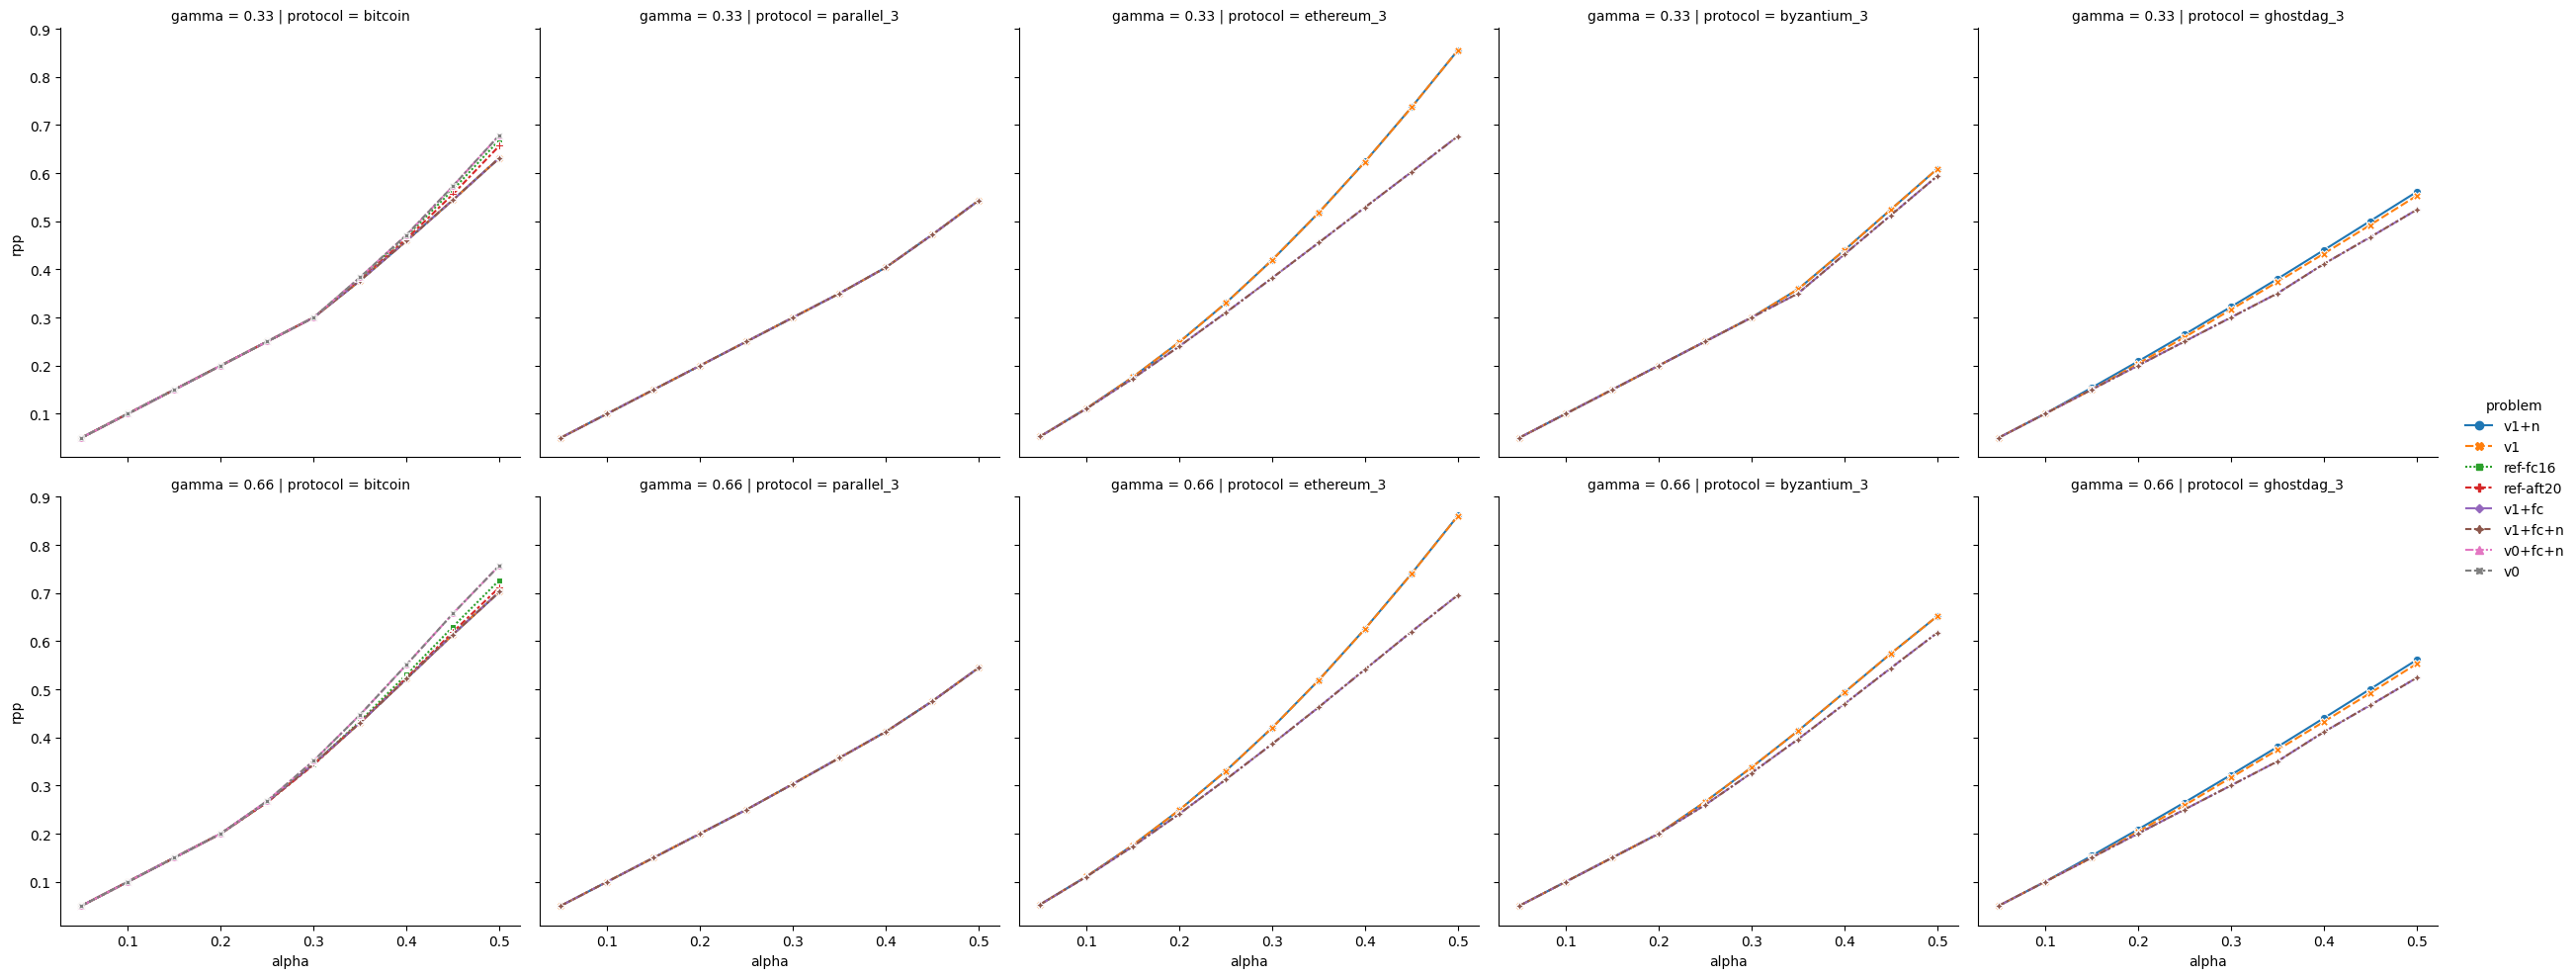

In [7]:
seaborn.relplot(
    data=df,
    kind="line",
    x="alpha",
    y="rpp",
    col="protocol",
    hue="problem",
    style="problem",
    markers=True,
    row="gamma",
)

# Revenue, PTO model, at source-model steady state

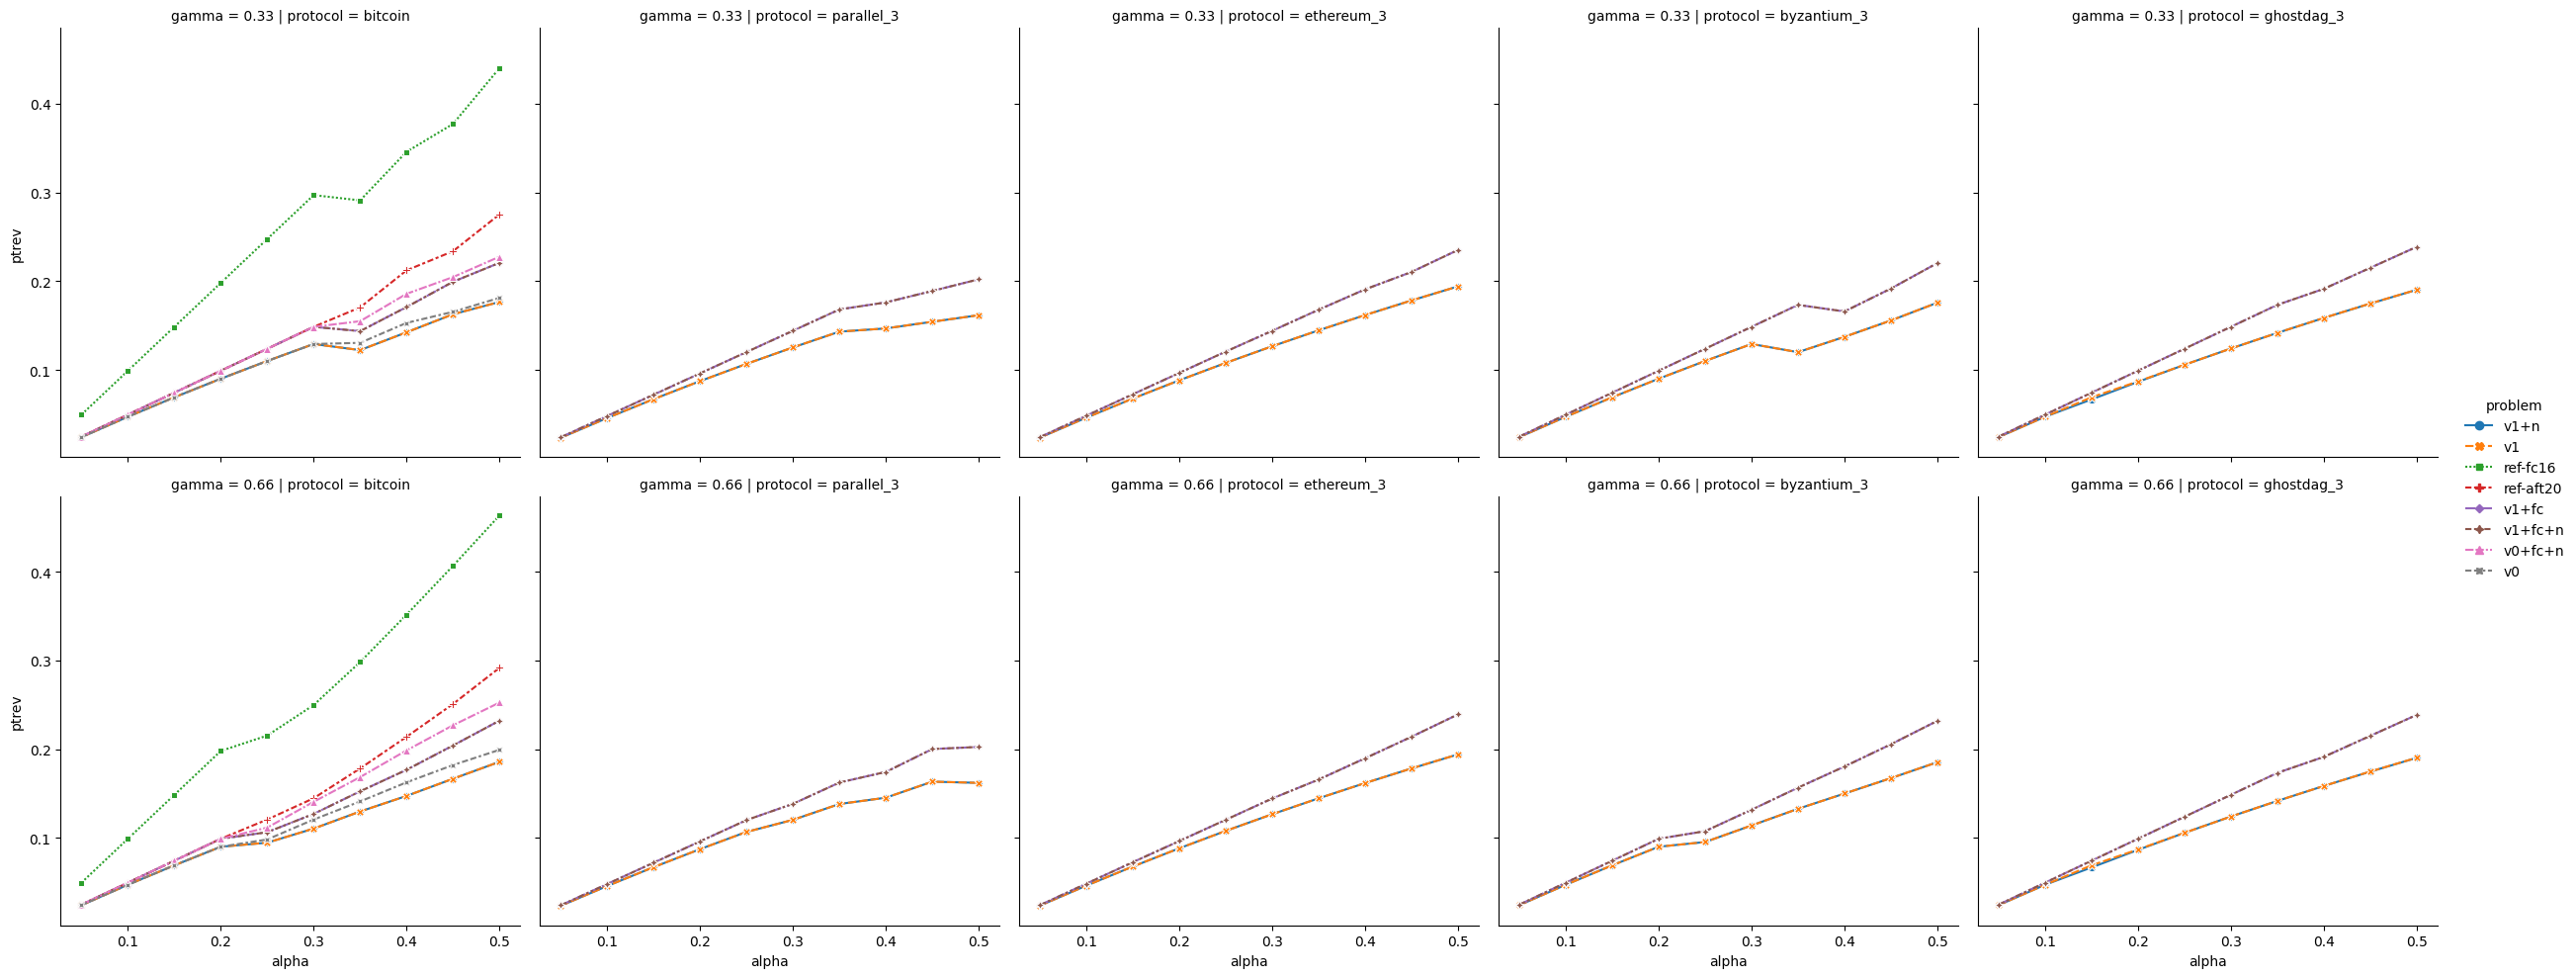

In [8]:
seaborn.relplot(
    data=df,
    kind="line",
    x="alpha",
    y="ptrev",
    col="protocol",
    hue="problem",
    style="problem",
    markers=True,
    row="gamma",
)